# How to Train YOLOv9 on a Custom Dataset
---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/train-yolov9-model/)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/XHT2c8jT3Bc)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Feb  4 17:00:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [3]:
!git clone https://github.com/WongKinYiu/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Total 781 (delta 0), reused 0 (delta 0), pack-reused 781 (from 1)
Receiving objects: 100% (781/781), 3.27 MiB | 6.86 MiB/s, done.
Resolving deltas: 100% (330/330), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [4]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.8 MB/s eta 0:00:00


## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [5]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Feb 29 11:06 .
drwxr-xr-x 1 root root      4096 Feb 29 11:06 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Download example data

**NOTE:** If you want to run inference using your own file as input, simply upload image to Google Colab and update `SOURCE_IMAGE_PATH` with the path leading to your file.

In [ ]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

## Detection with pre-trained COCO model

### gelan-c

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 235.8ms
Speed: 0.6ms pre-process, 235.8ms inference, 704.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

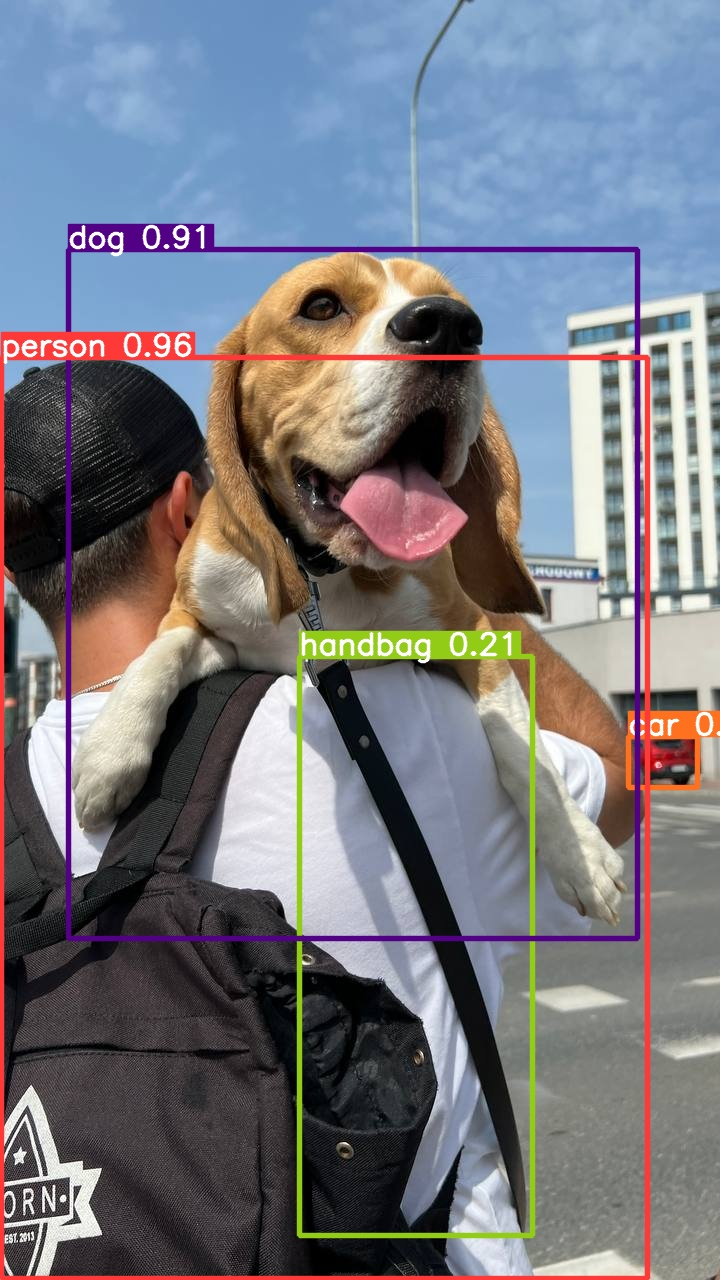

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

## yolov9-e

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 169.4ms
Speed: 0.5ms pre-process, 169.4ms inference, 489.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


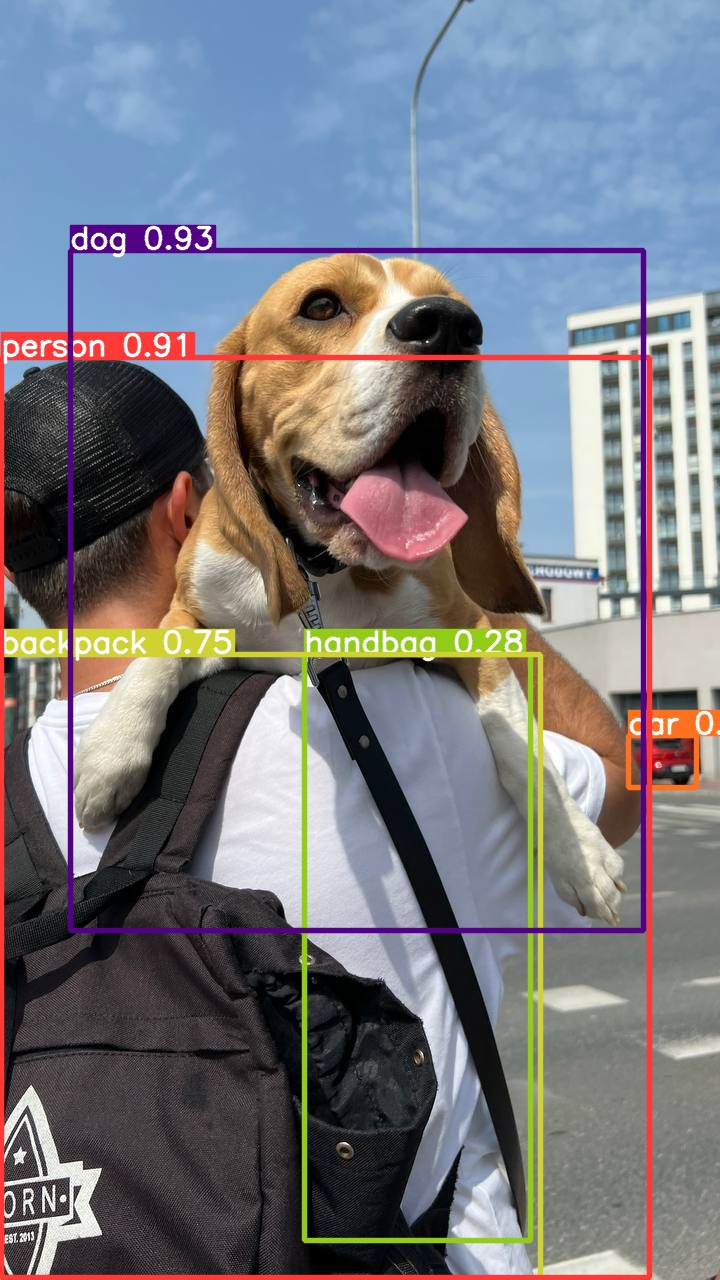

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/dog.jpeg", width=600)

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [6]:
%cd {HOME}/yolov9

/content/yolov9


**NOTE:** In this tutorial, I will use the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset. Feel free to replace it with your dataset in YOLO format or use another dataset available on [Roboflow Universe](https://universe.roboflow.com). Additionally, if you plan to deploy your model to Roboflow after training, make sure you are the owner of the dataset and that no model is associated with the version of the dataset you are going to training on.

In [ ]:
!pip install fiftyone

import fiftyone as fo
import fiftyone.zoo as foz

# Define the classes you want to include
classes = ["Human face", "Man", "Woman"]

# Load the Open Images V7 dataset
dataset = foz.load_zoo_dataset(
    "open-images-v7",
    split="train",
    label_types=["detections"],
    classes=classes,
    dataset_name="test-oidv7",
    max_samples=5000,  # Adjust this number based on your needs
)


# Export the dataset to COCO format
dataset.export(
    export_dir="/content/open-images-v7-coco",
    dataset_type=fo.types.COCODetectionDataset,
    classes=classes,
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/open-images-v7/train' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'train' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'train' is sufficient


Loading existing dataset 'test-oidv7'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'test-oidv7'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


Directory '/content/open-images-v7-coco' already exists; export will be merged with existing files


   0% ||--------------|    0/5000 [31.1ms elapsed, ? remaining, ? samples/s] 

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Dress' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Suit' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Curtain' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Fashion accessory' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Girl' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Flower' not in provided classes
  warnings.warn(msg)


/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Human body' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Human hair' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Human head' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Shirt' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Coat' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Glasses' not in provided classes
  warnings.warn(msg)


   0% ||--------------|    6/5000 [759.7ms elapsed, 10.5m remaining, 7.9 samples/s] 

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Footwear' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Building' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Necklace' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Sunglasses' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Scarf' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Goggles' not in provided classes
  warnings.warn(msg)
/usr/local/lib/pyt

   0% |/--------------|    7/5000 [864.6ms elapsed, 10.3m remaining, 8.1 samples/s] 

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Clothing' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Boy' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Chair' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Human ear' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Table' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Countertop' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.1

   0% |---------------|    9/5000 [1.1s elapsed, 9.9m remaining, 8.4 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Jeans' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Human mouth' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Human nose' not in provided classes
  warnings.warn(msg)


   0% ||--------------|   12/5000 [2.7s elapsed, 18.7m remaining, 4.4 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Drink' not in provided classes
  warnings.warn(msg)


   0% |/--------------|   13/5000 [3.6s elapsed, 22.8m remaining, 3.6 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Human arm' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Human hand' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Human beard' not in provided classes
  warnings.warn(msg)


   0% ||--------------|   17/5000 [4.6s elapsed, 22.5m remaining, 3.3 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Tie' not in provided classes
  warnings.warn(msg)


   0% |/--------------|   18/5000 [4.8s elapsed, 22.1m remaining, 3.0 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Plant' not in provided classes
  warnings.warn(msg)


   0% |/--------------|   23/5000 [5.8s elapsed, 21.0m remaining, 3.5 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Shorts' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Human leg' not in provided classes
  warnings.warn(msg)


   0% |\--------------|   25/5000 [6.3s elapsed, 20.8m remaining, 4.3 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Sofa bed' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Desk' not in provided classes
  warnings.warn(msg)


   1% |---------------|   29/5000 [7.2s elapsed, 20.6m remaining, 4.5 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Bottle' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Wine' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Cocktail' not in provided classes
  warnings.warn(msg)


   1% |/--------------|   32/5000 [7.7s elapsed, 19.9m remaining, 4.7 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Tableware' not in provided classes
  warnings.warn(msg)


   1% |\--------------|   35/5000 [8.0s elapsed, 18.8m remaining, 5.8 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Wine glass' not in provided classes
  warnings.warn(msg)


   1% |\--------------|   42/5000 [9.0s elapsed, 17.7m remaining, 7.2 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Microphone' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Skull' not in provided classes
  warnings.warn(msg)


   1% |/--------------|   46/5000 [9.4s elapsed, 16.8m remaining, 7.8 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Kitchen & dining room table' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Tent' not in provided classes
  warnings.warn(msg)


   1% ||--------------|   50/5000 [9.9s elapsed, 16.2m remaining, 7.9 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Hat' not in provided classes
  warnings.warn(msg)


   1% |/--------------|   57/5000 [10.6s elapsed, 15.2m remaining, 9.2 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Couch' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Beer' not in provided classes
  warnings.warn(msg)


   1% |\--------------|   59/5000 [10.9s elapsed, 15.2m remaining, 8.5 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Tree' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Dog' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Furniture' not in provided classes
  warnings.warn(msg)


   1% |---------------|   65/5000 [11.8s elapsed, 14.8m remaining, 7.5 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Food' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Flute' not in provided classes
  warnings.warn(msg)


   1% ||--------------|   68/5000 [12.0s elapsed, 14.5m remaining, 7.5 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Jacket' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Office building' not in provided classes
  warnings.warn(msg)


   1% |\--------------|   73/5000 [12.4s elapsed, 13.8m remaining, 9.8 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Houseplant' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Flowerpot' not in provided classes
  warnings.warn(msg)


   2% |/--------------|   77/5000 [12.8s elapsed, 13.5m remaining, 11.6 samples/s]  

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Sock' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Volleyball (Ball)' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Sports uniform' not in provided classes
  warnings.warn(msg)


   2% ||--------------|   83/5000 [13.6s elapsed, 13.3m remaining, 10.1 samples/s]  

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Guitar' not in provided classes
  warnings.warn(msg)


   2% |/--------------|   90/5000 [14.2s elapsed, 12.8m remaining, 9.6 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Pumpkin' not in provided classes
  warnings.warn(msg)


   2% |---------------|   97/5000 [15.0s elapsed, 12.6m remaining, 10.0 samples/s]  

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Christmas tree' not in provided classes
  warnings.warn(msg)


   2% |\--------------|   99/5000 [15.2s elapsed, 12.4m remaining, 10.3 samples/s]  

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Plate' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Saucer' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Platter' not in provided classes
  warnings.warn(msg)


   2% |\--------------|  115/5000 [19.9s elapsed, 14.3m remaining, 3.6 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Boat' not in provided classes
  warnings.warn(msg)


   2% ||--------------|  116/5000 [20.3s elapsed, 14.5m remaining, 3.3 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Sports equipment' not in provided classes
  warnings.warn(msg)


   3% |/--------------|  129/5000 [22.1s elapsed, 13.9m remaining, 7.0 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Aircraft' not in provided classes
  warnings.warn(msg)


   3% |---------------|  144/5000 [25.2s elapsed, 14.2m remaining, 4.9 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Umbrella' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Fast food' not in provided classes
  warnings.warn(msg)


   3% |\--------------|  150/5000 [26.0s elapsed, 13.9m remaining, 9.0 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Bicycle' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Bicycle wheel' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Bicycle helmet' not in provided classes
  warnings.warn(msg)


   3% |---------------|  155/5000 [26.5s elapsed, 13.7m remaining, 8.4 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Doll' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Tiara' not in provided classes
  warnings.warn(msg)


   3% |\--------------|  157/5000 [26.6s elapsed, 13.5m remaining, 9.2 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Crown' not in provided classes
  warnings.warn(msg)


   3% |/--------------|  162/5000 [26.9s elapsed, 13.2m remaining, 11.7 samples/s]  

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Drum' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Human foot' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Balloon' not in provided classes
  warnings.warn(msg)


   3% |\--------------|  164/5000 [27.3s elapsed, 13.2m remaining, 10.3 samples/s]  

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Vehicle' not in provided classes
  warnings.warn(msg)


   3% ||--------------|  170/5000 [28.3s elapsed, 13.3m remaining, 7.9 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Ball' not in provided classes
  warnings.warn(msg)


   4% |\--------------|  175/5000 [28.7s elapsed, 13.1m remaining, 7.2 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Land vehicle' not in provided classes
  warnings.warn(msg)


/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Flag' not in provided classes
  warnings.warn(msg)


   4% |/--------------|  184/5000 [29.6s elapsed, 12.7m remaining, 10.3 samples/s]  

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Tire' not in provided classes
  warnings.warn(msg)


   4% ||--------------|  188/5000 [30.2s elapsed, 12.8m remaining, 8.7 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Camera' not in provided classes
  warnings.warn(msg)


   4% |\--------------|  207/5000 [33.7s elapsed, 13.2m remaining, 4.3 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Car' not in provided classes
  warnings.warn(msg)


   4% |/--------------|  210/5000 [34.0s elapsed, 13.0m remaining, 5.1 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Bronze sculpture' not in provided classes
  warnings.warn(msg)


   4% |\--------------|  213/5000 [34.6s elapsed, 13.1m remaining, 4.9 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Brassiere' not in provided classes
  warnings.warn(msg)


   4% ||--------------|  225/5000 [36.8s elapsed, 13.1m remaining, 5.5 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Window' not in provided classes
  warnings.warn(msg)


   5% |/--------------|  234/5000 [37.6s elapsed, 12.5m remaining, 10.2 samples/s]  

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Bus' not in provided classes
  warnings.warn(msg)


   5% |\--------------|  237/5000 [38.2s elapsed, 12.6m remaining, 9.7 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Mule' not in provided classes
  warnings.warn(msg)


   5% ||--------------|  243/5000 [39.1s elapsed, 12.7m remaining, 6.8 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Laptop' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Computer keyboard' not in provided classes
  warnings.warn(msg)


   5% |/--------------|  250/5000 [40.1s elapsed, 12.7m remaining, 6.6 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'House' not in provided classes
  warnings.warn(msg)


   5% ||--------------|  260/5000 [41.4s elapsed, 12.4m remaining, 8.2 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Football' not in provided classes
  warnings.warn(msg)


   5% |\--------------|  268/5000 [43.1s elapsed, 12.7m remaining, 6.3 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Table tennis racket' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Sandal' not in provided classes
  warnings.warn(msg)


   6% |\--------------|  300/5000 [47.0s elapsed, 12.1m remaining, 7.9 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Wheel' not in provided classes
  warnings.warn(msg)


   6% |\--------------|  305/5000 [47.6s elapsed, 12.1m remaining, 7.5 samples/s]   

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Palm tree' not in provided classes
  warnings.warn(msg)


   8% |█\-------------|  386/5000 [1.0m elapsed, 12.0m remaining, 6.4 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Baseball bat' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Baseball glove' not in provided classes
  warnings.warn(msg)


   8% |█|-------------|  388/5000 [1.0m elapsed, 11.8m remaining, 7.8 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Skyscraper' not in provided classes
  warnings.warn(msg)


   9% |█/-------------|  429/5000 [1.1m elapsed, 11.7m remaining, 9.6 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Cake' not in provided classes
  warnings.warn(msg)


   9% |█\-------------|  436/5000 [1.2m elapsed, 12.0m remaining, 6.8 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Cello' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Violin' not in provided classes
  warnings.warn(msg)


   9% |█|-------------|  447/5000 [1.2m elapsed, 12.0m remaining, 6.7 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Horse' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Paddle' not in provided classes
  warnings.warn(msg)


  10% |█/-------------|  492/5000 [1.3m elapsed, 11.3m remaining, 9.4 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Parrot' not in provided classes
  warnings.warn(msg)


  10% |█\-------------|  501/5000 [1.3m elapsed, 11.5m remaining, 7.2 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Toy' not in provided classes
  warnings.warn(msg)


  11% |█\-------------|  526/5000 [1.4m elapsed, 12.5m remaining, 4.3 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Poster' not in provided classes
  warnings.warn(msg)


  11% |█|-------------|  560/5000 [1.5m elapsed, 11.3m remaining, 8.6 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Picnic basket' not in provided classes
  warnings.warn(msg)


  12% |█/-------------|  575/5000 [1.5m elapsed, 11.1m remaining, 9.2 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Trousers' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Miniskirt' not in provided classes
  warnings.warn(msg)


  13% |█--------------|  643/5000 [1.7m elapsed, 11.3m remaining, 6.4 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Swimwear' not in provided classes
  warnings.warn(msg)


  13% |█|-------------|  646/5000 [1.7m elapsed, 11.1m remaining, 7.4 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Coconut' not in provided classes
  warnings.warn(msg)


  13% |█/-------------|  655/5000 [1.7m elapsed, 10.8m remaining, 9.0 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Mechanical fan' not in provided classes
  warnings.warn(msg)


  14% |██\------------|  682/5000 [1.8m elapsed, 10.8m remaining, 7.8 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Picture frame' not in provided classes
  warnings.warn(msg)


  14% |██-------------|  687/5000 [1.8m elapsed, 10.9m remaining, 7.2 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Bookcase' not in provided classes
  warnings.warn(msg)


  15% |██\------------|  749/5000 [2.0m elapsed, 11.0m remaining, 6.9 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Salt and pepper shakers' not in provided classes
  warnings.warn(msg)


  16% |██/------------|  794/5000 [2.0m elapsed, 10.8m remaining, 6.5 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Personal flotation device' not in provided classes
  warnings.warn(msg)


  16% |██|------------|  812/5000 [2.1m elapsed, 10.9m remaining, 6.3 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Musical instrument' not in provided classes
  warnings.warn(msg)


/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Helmet' not in provided classes
  warnings.warn(msg)


  18% |██-------------|  891/5000 [2.3m elapsed, 11.2m remaining, 4.9 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Coffee cup' not in provided classes
  warnings.warn(msg)


  20% |██\------------|  989/5000 [2.5m elapsed, 10.1m remaining, 6.8 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Baked goods' not in provided classes
  warnings.warn(msg)


  20% |██\------------|  996/5000 [2.5m elapsed, 9.6m remaining, 8.9 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Bust' not in provided classes
  warnings.warn(msg)


  20% |███\-----------| 1013/5000 [2.6m elapsed, 10.2m remaining, 6.2 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Candle' not in provided classes
  warnings.warn(msg)


  21% |███|-----------| 1037/5000 [2.6m elapsed, 10.4m remaining, 5.7 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Lantern' not in provided classes
  warnings.warn(msg)


  21% |███\-----------| 1052/5000 [2.7m elapsed, 9.6m remaining, 8.4 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Motorcycle' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Television' not in provided classes
  warnings.warn(msg)


  21% |███\-----------| 1072/5000 [2.7m elapsed, 9.4m remaining, 8.9 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Wheelchair' not in provided classes
  warnings.warn(msg)


  22% |███|-----------| 1103/5000 [2.8m elapsed, 9.2m remaining, 9.1 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Closet' not in provided classes
  warnings.warn(msg)


  24% |███\-----------| 1206/5000 [3.0m elapsed, 9.3m remaining, 7.5 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Headphones' not in provided classes
  warnings.warn(msg)


  25% |███/-----------| 1268/5000 [3.2m elapsed, 8.2m remaining, 14.0 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Rose' not in provided classes
  warnings.warn(msg)


  26% |███------------| 1289/5000 [3.3m elapsed, 8.9m remaining, 8.1 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Shelf' not in provided classes
  warnings.warn(msg)


  26% |███|-----------| 1321/5000 [3.3m elapsed, 9.2m remaining, 7.0 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Mobile phone' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Snake' not in provided classes
  warnings.warn(msg)


  27% |████/----------| 1337/5000 [3.4m elapsed, 9.0m remaining, 7.6 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Fruit' not in provided classes
  warnings.warn(msg)


  27% |████-----------| 1358/5000 [3.4m elapsed, 8.3m remaining, 10.3 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Swim cap' not in provided classes
  warnings.warn(msg)


  29% |████/----------| 1460/5000 [3.7m elapsed, 8.3m remaining, 8.8 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Organ (Musical Instrument)' not in provided classes
  warnings.warn(msg)


  30% |████/----------| 1479/5000 [3.7m elapsed, 8.2m remaining, 9.0 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Swimming pool' not in provided classes
  warnings.warn(msg)


  30% |████\----------| 1504/5000 [3.8m elapsed, 8.9m remaining, 6.4 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Cattle' not in provided classes
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Bull' not in provided classes
  warnings.warn(msg)


  30% |████|----------| 1525/5000 [3.8m elapsed, 9.5m remaining, 5.1 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Handbag' not in provided classes
  warnings.warn(msg)


  31% |████|----------| 1563/5000 [3.9m elapsed, 7.6m remaining, 10.8 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Auto part' not in provided classes
  warnings.warn(msg)


  31% |████\----------| 1568/5000 [3.9m elapsed, 8.1m remaining, 8.3 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Sculpture' not in provided classes
  warnings.warn(msg)


  35% |█████----------| 1771/5000 [4.4m elapsed, 7.1m remaining, 10.2 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Door' not in provided classes
  warnings.warn(msg)


  36% |█████|---------| 1775/5000 [4.4m elapsed, 6.9m remaining, 10.8 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Computer monitor' not in provided classes
  warnings.warn(msg)


  36% |█████----------| 1794/5000 [4.5m elapsed, 7.7m remaining, 7.3 samples/s]     

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Convenience store' not in provided classes
  warnings.warn(msg)


  38% |█████\---------| 1901/5000 [4.7m elapsed, 6.7m remaining, 10.1 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Truck' not in provided classes
  warnings.warn(msg)


  40% |█████\---------| 1980/5000 [4.9m elapsed, 6.1m remaining, 12.6 samples/s]    

/usr/local/lib/python3.11/dist-packages/fiftyone/utils/coco.py:890: UserWarning: Ignoring object with label 'Snack' not in provided classes
  warnings.warn(msg)


  40% |█████|---------| 1995/5000 [4.9m elapsed, 6.6m remaining, 9.2 samples/s]     

In [18]:
#import roboflow

#roboflow.login()

#rf = roboflow.Roboflow()

#project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
#version = project.version(8)
#dataset = version.download("yolov9")

%rm -rf /content/open-images-v7-yolo/

## Train Custom Model

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    P_curve.png       train_batch2.jpg
events.out.tfevents.1709205293.f80636ca2632.2700.0  PR_curve.png      val_batch0_labels.jpg
F1_curve.png					    R_curve.png       val_batch0_pred.jpg
hyp.yaml					    results.csv       val_batch1_labels.jpg
labels_correlogram.jpg				    results.png       val_batch1_pred.jpg
labels.jpg					    train_batch0.jpg  weights
opt.yaml					    train_batch1.jpg


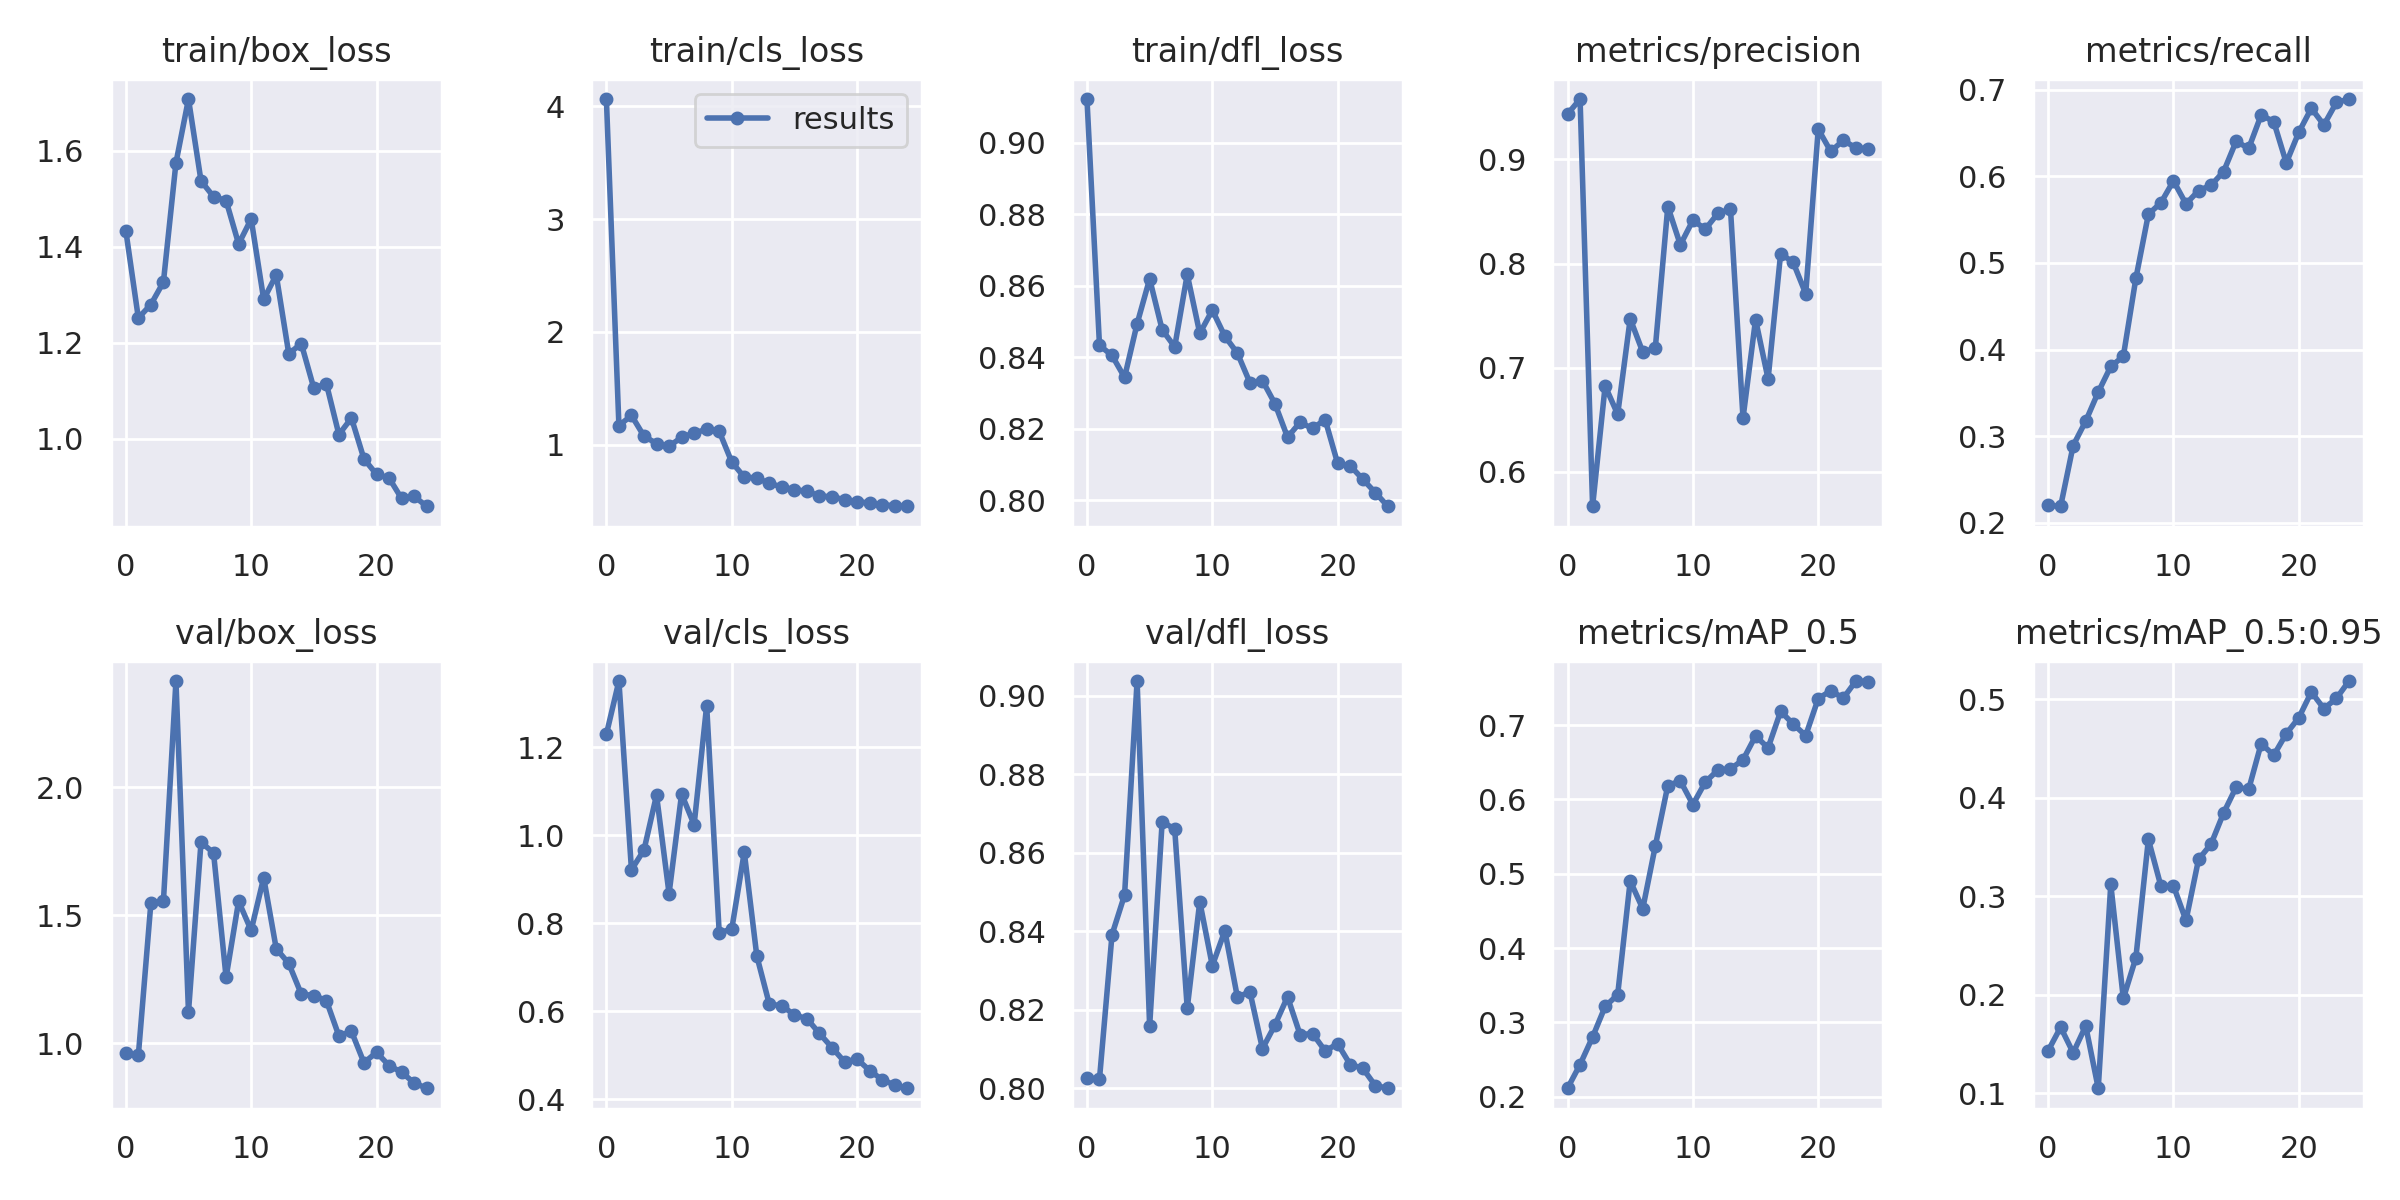

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

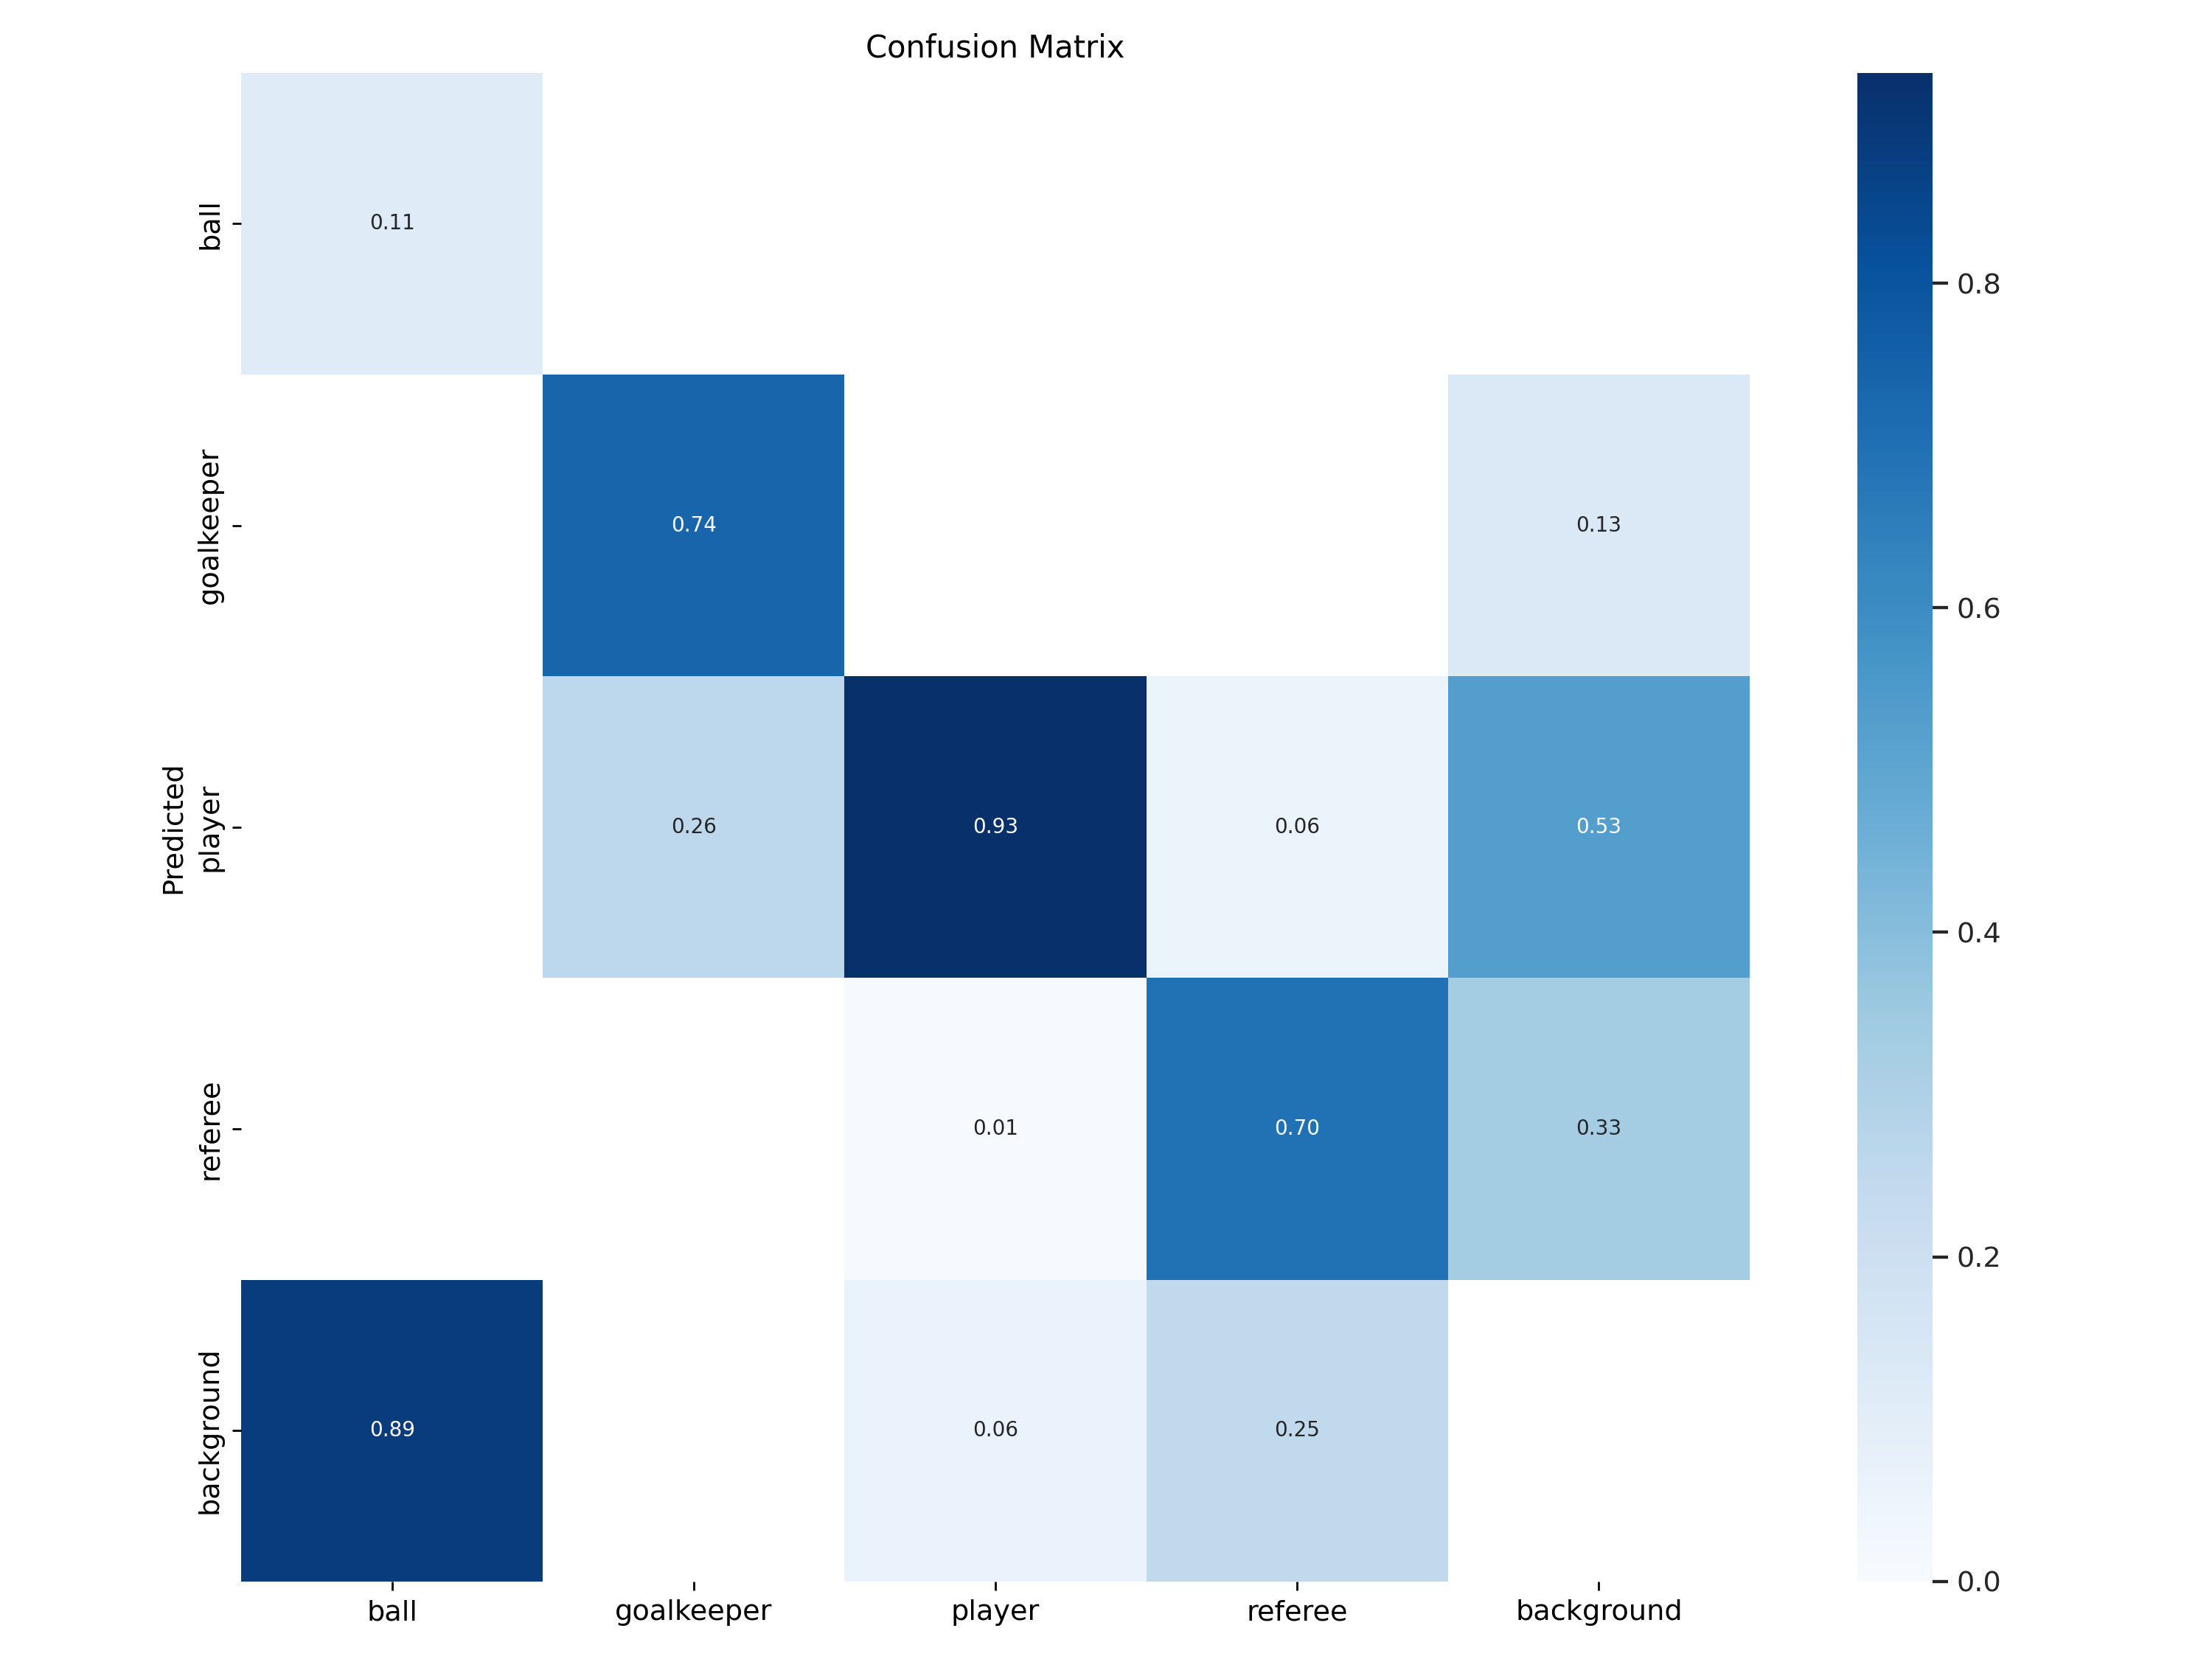

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

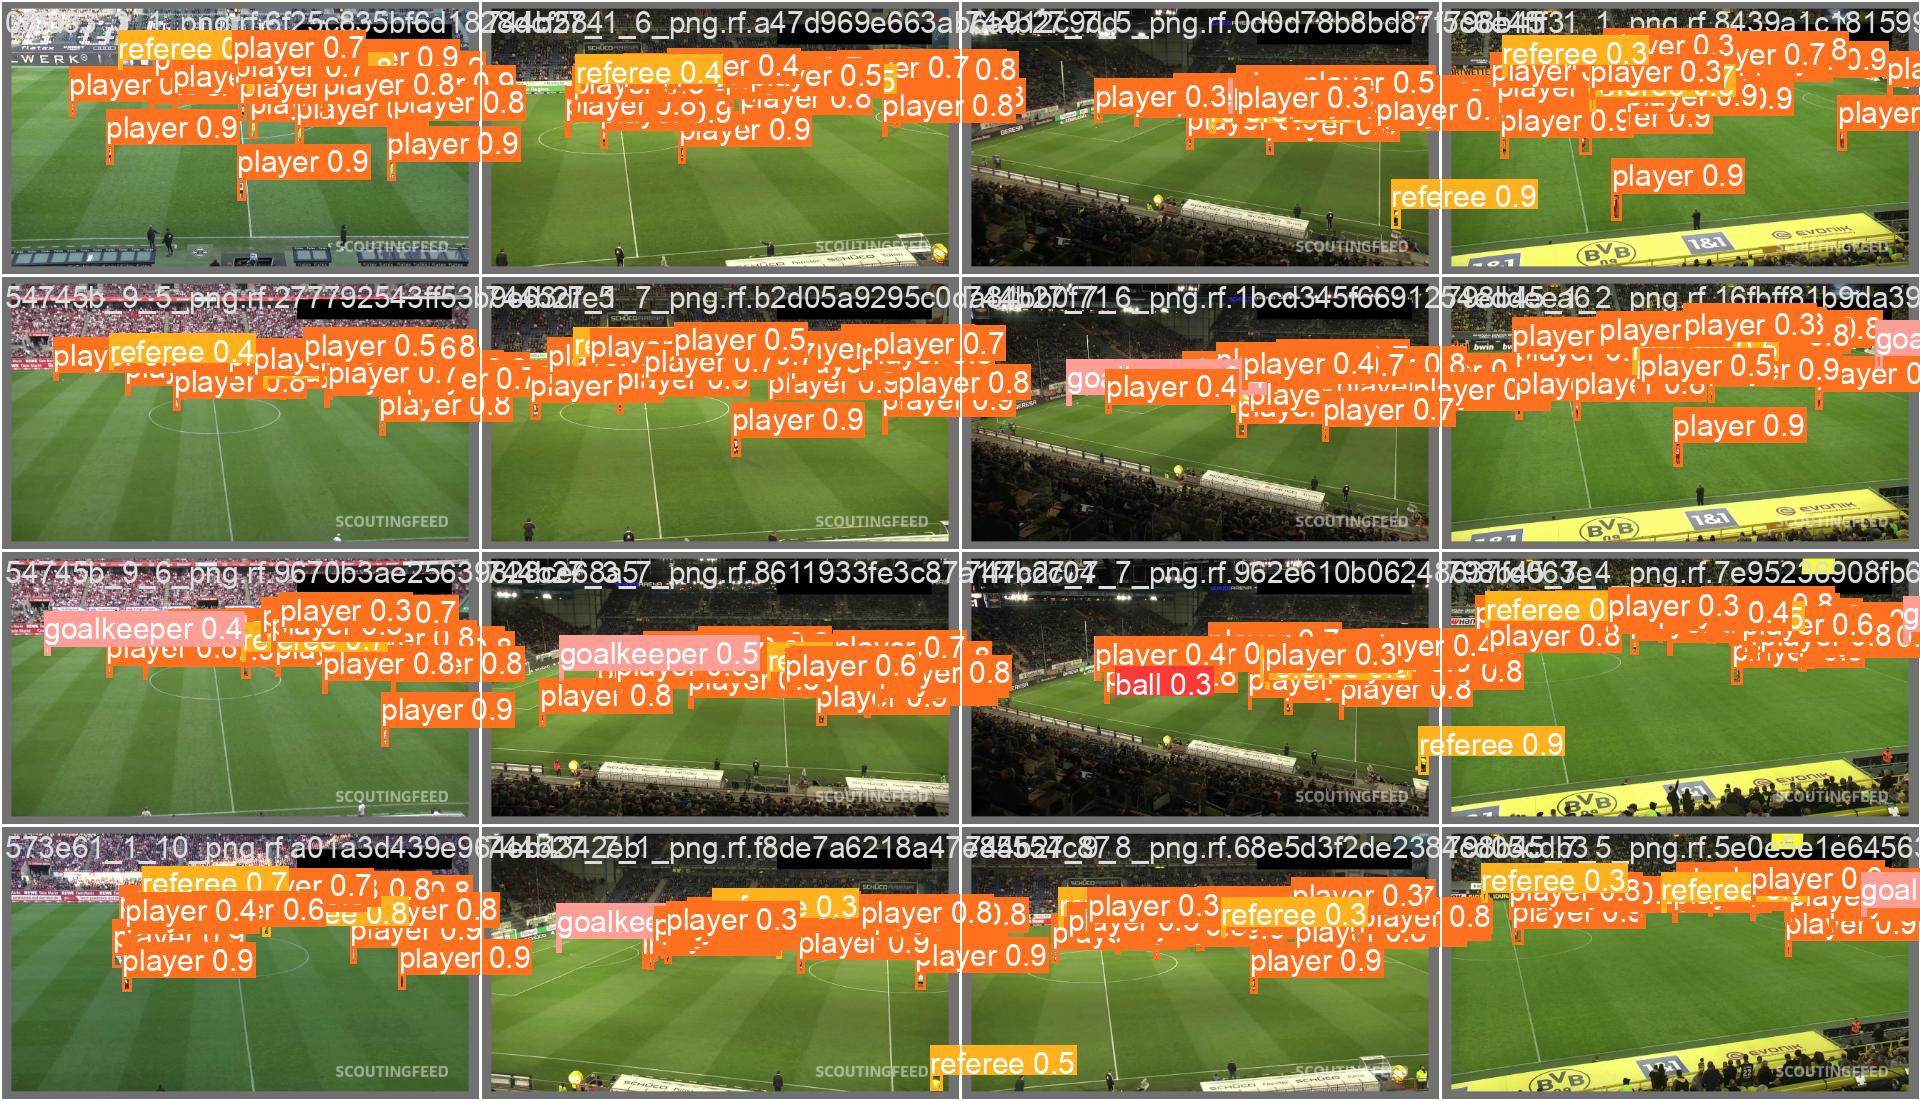

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/football-players-detection-6/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/football-players-detection-6/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:04<00:00,  2.22s/it]
                   all         38        905       0.91      0.689      0.759      0.528
                  ball     

## Inference with Custom Model

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

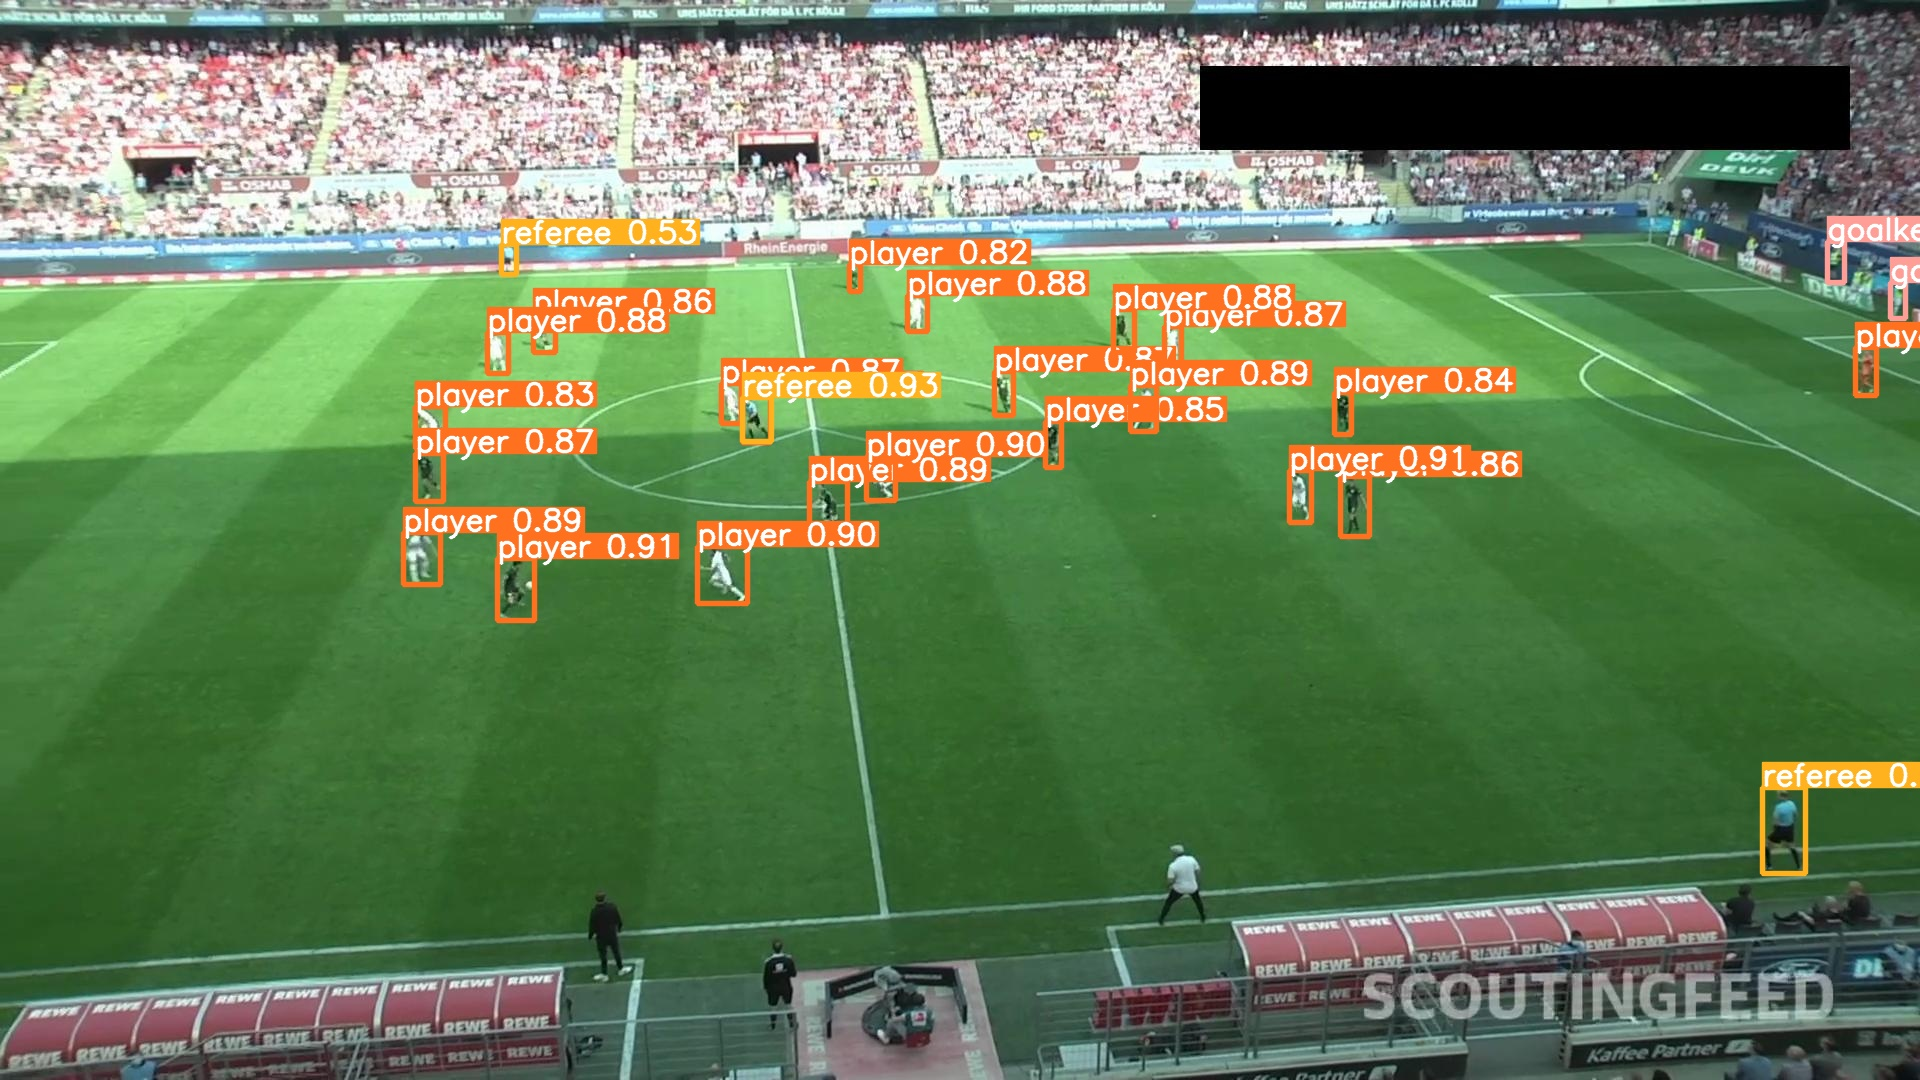

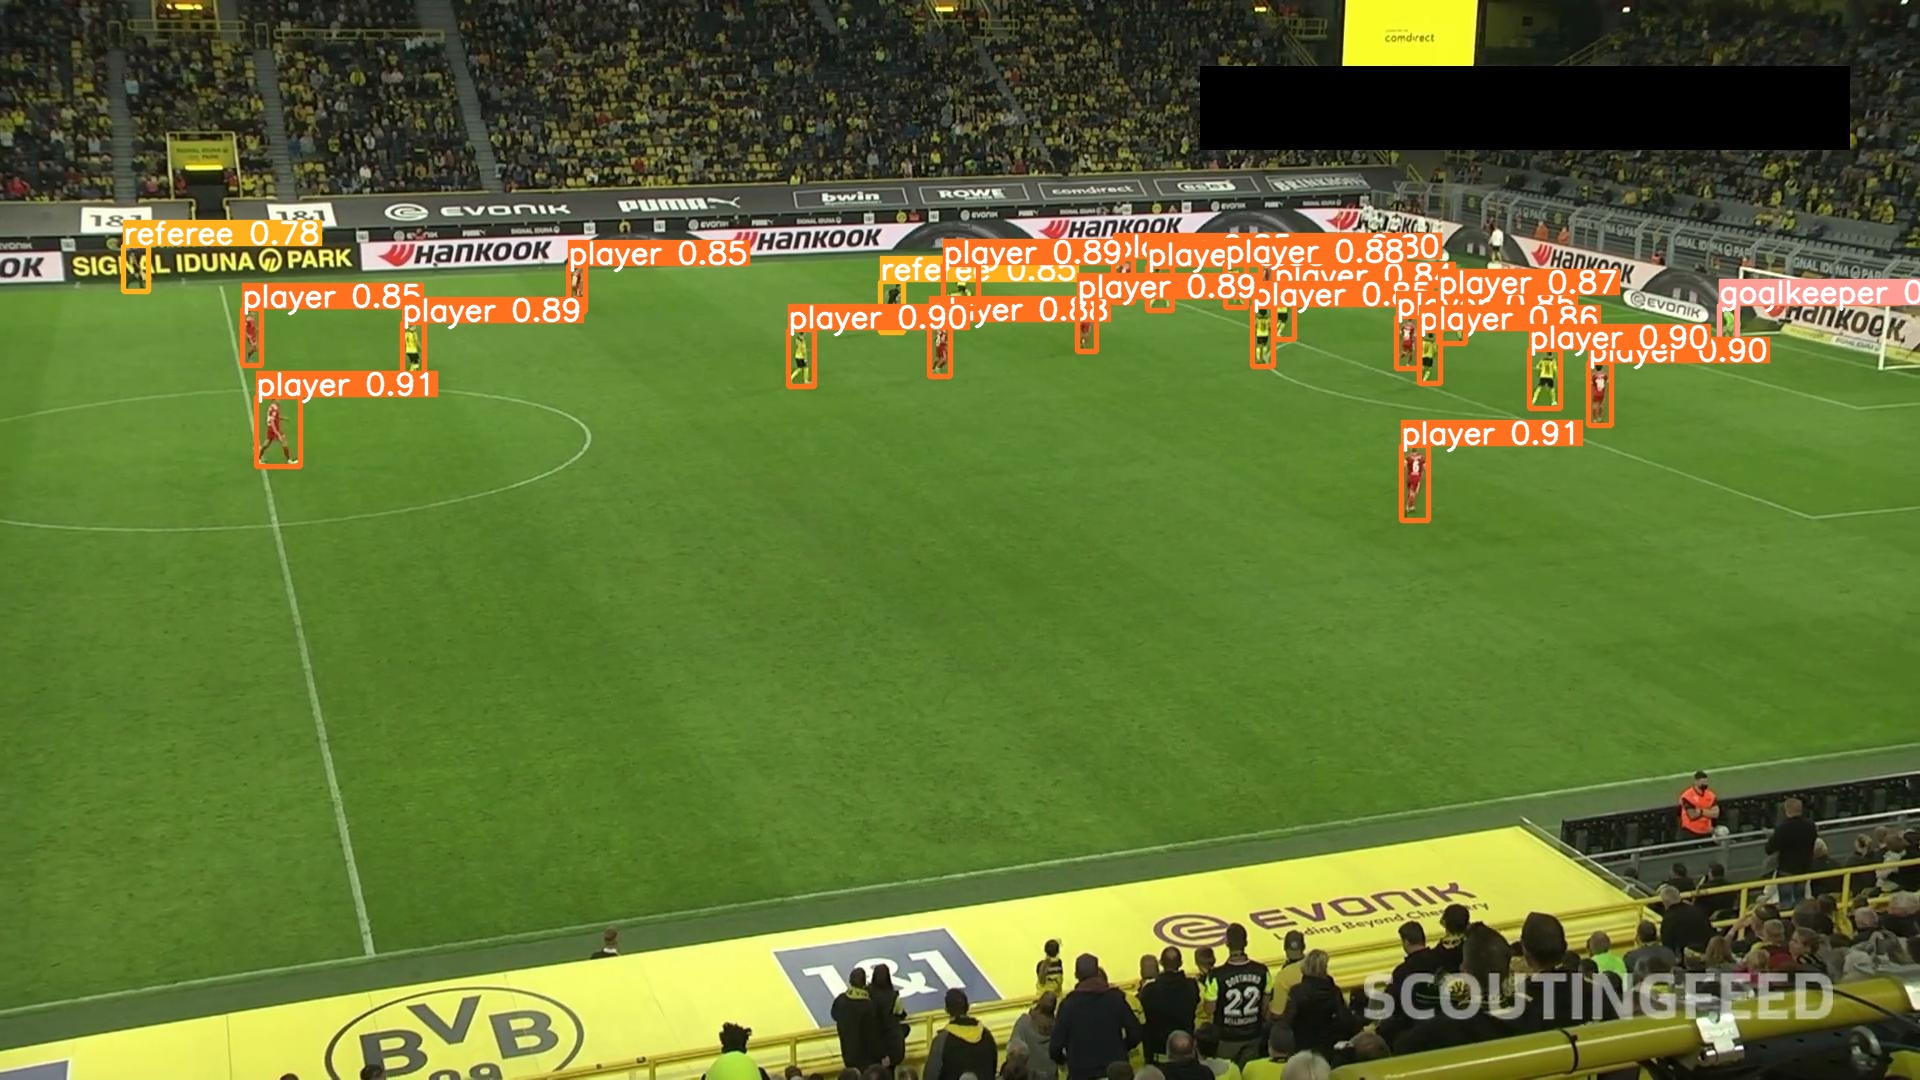

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

## BONUS: Deploy YOLOv9 Model with Inference

**NOTE:** To deploy the model and display inference results, we will need two additional packages - [`inference`](https://pypi.org/project/inference) and [`supervision`](https://pypi.org/project/supervision). Let's install and import them!

In [ ]:
!pip install -q inference supervision

In [ ]:
import cv2
import random
import getpass

import supervision as sv

from inference import get_model

%matplotlib inline

**NOTE:** Before using your model in Inference, you first need to upload your weights to Roboflow Universe. Ensure to specify the correct `model_type` - `yolov9`, and that the project version matches the version of the dataset you used for training, denoted by `[1]`. In my case, it's `6`.

![YOLOv9 Benchmark](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/upload-roboflow-model.png)



In [ ]:
version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/6
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/model/6


**NOTE:** Now we can download our model anywhere using the assigned `model_id` denoted by `[2]`. In my case `football-players-detection-3zvbc/6`. To download the model you will need your [`ROBOFLOW_API_KEY`](https://docs.roboflow.com/api-reference/authentication).




In [ ]:
ROBOFLOW_API_KEY = getpass.getpass()

model = get_model(model_id="football-players-detection-3zvbc/8", api_key=ROBOFLOW_API_KEY)

··········


**NOTE:** Let's pick random image from our test subset and detect objects using newly fine-tuned model.

In [ ]:
image_paths = sv.list_files_with_extensions(
    directory=f"{dataset.location}/test/images",
    extensions=['png', 'jpg', 'jpeg']
)
image_path = random.choice(image_paths)
image = cv2.imread(image_path)

result = model.infer(image, confidence=0.1)[0]
detections = sv.Detections.from_inference(result)

**NOTE:** Finally, let's use supervision and [annotate](https://supervision.roboflow.com/develop/annotators/) our results.

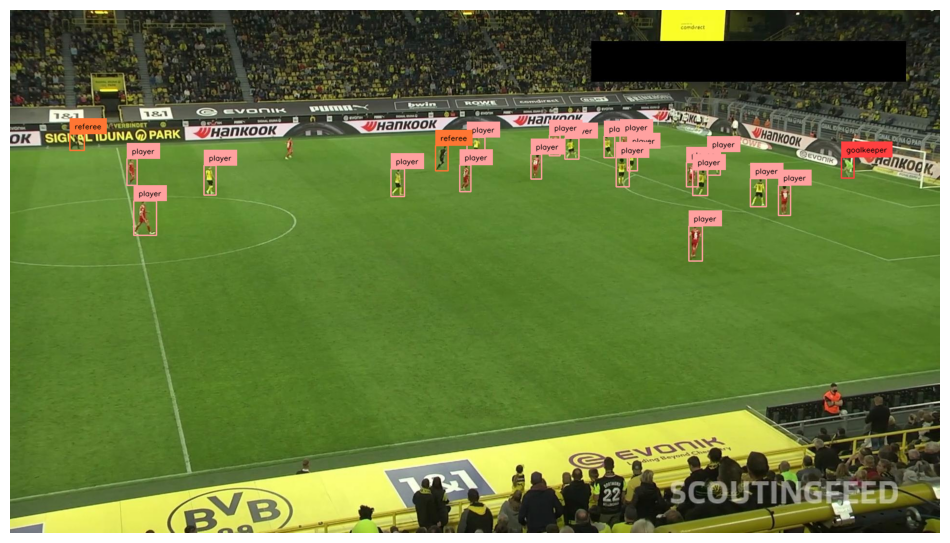

In [ ]:
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
bounding_box_annotator = sv.BoundingBoxAnnotator()

annotated_image = image.copy()
annotated_image = bounding_box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)